In [1]:
import graph_generator
import numpy as np
import city_tests
import networkx as nx


In [2]:
G = graph_generator.get_graph('R347950') # 0.0005094836044638375
# N = 1000
# for p in range(30,31, 1):
#     G = nx.fast_gnp_random_graph(N, p / N, seed=123, directed=False)
#     if not nx.is_connected(G):
#         tmp = []
#         for n in nx.connected_components(G):
#             for q in n:
#                 tmp.append(q)
#                 break
#         for i in range(len(tmp) - 1):
#             G.add_edge(tmp[i], tmp[i + 1])
#     print('be connected: {}'.format(nx.is_connected(G)))
#     N = len(G.nodes)
#     M = len(G.edges)
#     for e in G.edges:
#         l = np.random.random_sample()
#         G.add_edge(e[0], e[1], length=l)
# print(nx.density(G))

In [3]:
communities = graph_generator.resolve_communities(G, 2)

generate communities


In [4]:
for u in G:
    if u in G[u]:
        G.remove_edge(u,u)

In [5]:
# k = []
# for u in G:
#     for v in G[u]:
#         l = G[u][v]['length']
#         p = nx.single_source_dijkstra(G, u,v,weight='length')
#         if abs(l-p[0])> 0.0001:
#             k.append((u,v))
            # print(l,p[0])

# for u,v in k:
#     if u in G.nodes and v in G[u]:
#         G.remove_edge(u,v)

generate points: 100%|██████████| 100/100 [00:00<00:00, 6384.70it/s]


generate communities
start
generate communities
alpha: 0.36. resolution: 1000.50
generate communities
alpha: 0.25. resolution: 500.75
generate communities
alpha: 0.18. resolution: 250.88
generate communities
alpha: 0.22. resolution: 375.81
generate communities
alpha: 0.20. resolution: 313.34


generate centers: 1800it [00:00, 4820.55it/s]
generate roads: 100%|██████████| 1800/1800 [00:09<00:00, 198.45it/s]


usual: 5381.18  my:5742.55
usual: 4116.21  my:4446.49
usual: 2878.28  my:3069.09
usual: 2020.35  my:2945.27
usual: 7668.48  my:8454.22
usual: 6380.37  my:7922.54
usual: 5448.11  my:6089.02
usual: 3764.01  my:4184.34
usual: 14242.07  my:16247.05
usual: 3253.24  my:4038.61
usual: 3279.71  my:3543.01
usual: 5983.88  my:6715.70
usual: 6936.35  my:8325.25
usual: 4130.64  my:4238.36
usual: 5407.20  my:5886.20
usual: 3202.20  my:3906.04
usual: 3548.85  my:3691.60
usual: 9529.42  my:10134.36
usual: 4709.17  my:4817.67
usual: 9285.45  my:10474.71
usual: 3025.75  my:3294.55
usual: 6435.72  my:7125.94
usual: 8966.42  my:9425.97
usual: 7516.63  my:8417.21
usual: 3697.19  my:3970.32
usual: 9883.68  my:12013.01
usual: 4530.81  my:5192.25
usual: 2622.05  my:3048.85
usual: 3649.93  my:3778.46
usual: 7528.23  my:8613.40
usual: 10558.28  my:11235.61
usual: 4182.39  my:4826.52
usual: 2601.26  my:2725.51
usual: 5042.10  my:5486.16
usual: 4112.28  my:4985.29
usual: 1334.80  my:1671.18
usual: 3631.82  my:51

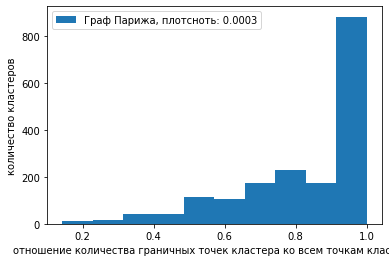

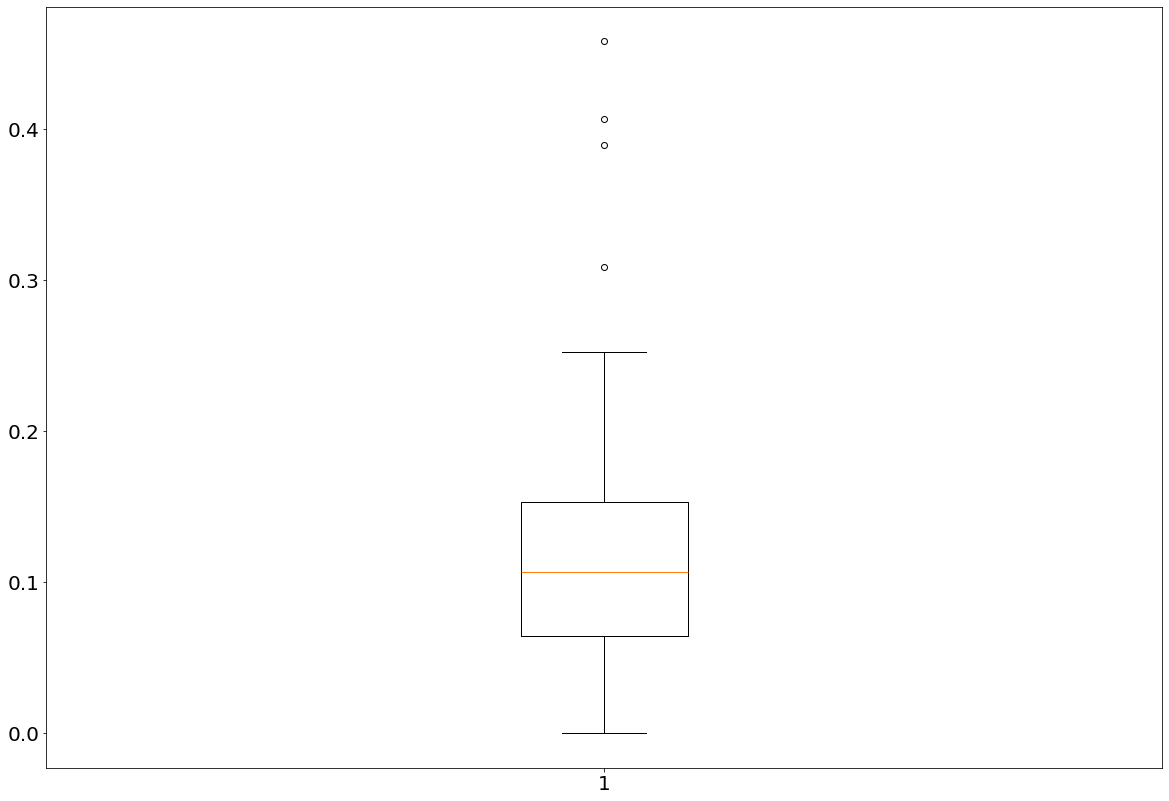

In [6]:
import city_tests


city_tests.test_graph_dynamic(G, 'name', 'name')

In [7]:
from matplotlib import pyplot as plt


In [8]:
x = [len(c) for c in communities]
print(len(G.nodes)/ len(communities))
print(np.mean(x))

70.85714285714286
70.85714285714286


(array([21., 17., 19., 22., 17., 12.,  6.,  8.,  3.,  1.]),
 array([  3. ,  22.9,  42.8,  62.7,  82.6, 102.5, 122.4, 142.3, 162.2,
        182.1, 202. ]),
 <BarContainer object of 10 artists>)

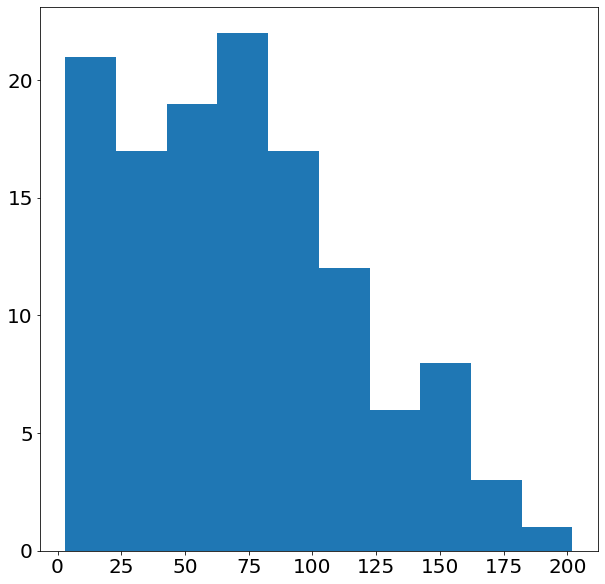

In [9]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(10)

axs.hist(x)
# axs.legend()

In [10]:
x_edges = [len(graph_generator.extract_cluster_subgraph(G, i).edges) for i in range(len(communities))]

print(len(G.edges)/len(communities))
print(np.mean(x_edges))

110.67460317460318
10.61111111111111


(array([15., 29., 27., 17., 17.,  8.,  7.,  3.,  1.,  2.]),
 array([ 7. ,  8.1,  9.2, 10.3, 11.4, 12.5, 13.6, 14.7, 15.8, 16.9, 18. ]),
 <BarContainer object of 10 artists>)

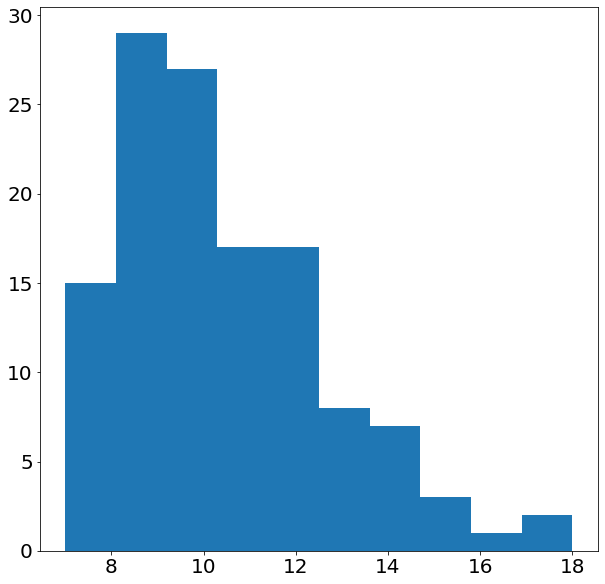

In [11]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(10)

axs.hist(x_edges)

In [12]:

from tqdm import trange

points = [city_tests.get_node_for_initial_graph_v2(G) for i in trange(10000)]


100%|██████████| 10000/10000 [00:00<00:00, 11310.32it/s]


In [13]:

from tqdm import tqdm

x_paths = []
for p1,p2 in tqdm(points):
    p = nx.single_source_dijkstra(G, p1,p2,weight='length')[1]
    x_paths.append(len(set([G.nodes[u]['cluster'] for u in p])))

100%|██████████| 10000/10000 [04:35<00:00, 36.25it/s]


In [14]:

print(np.sqrt(len(communities)))
print(np.mean(x_paths))

11.224972160321824
29.2754


(array([ 635., 1804., 2150., 2294., 1523.,  956.,  436.,  142.,   51.,
           9.]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <BarContainer object of 10 artists>)

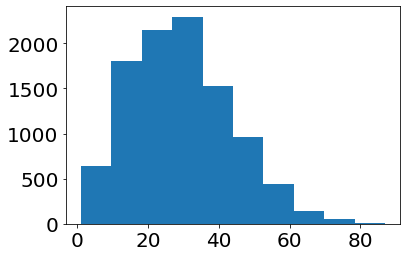

In [15]:

plt.hist(x_paths)

In [16]:
# print(x_paths)

In [17]:
from folium import folium
import map_drawer
import webbrowser

for p1,p2 in points:
    p = nx.single_source_dijkstra(G, p1,p2,weight='length')
    cls = set([G.nodes[u]['cluster'] for u in p[1]])
    if len(cls) > 30:
        # graph_map: folium.Map = drawer.draw_on_map(G)
        Q = graph_generator.extract_cluster_list_subgraph(G, cls)
        P = G.subgraph(p[1])
        print(len(P.nodes))
        graph_map: folium.Map = map_drawer.draw_on_map(Q,communities )
        graph_map: folium.Map = map_drawer.draw_on_map(P,node_colors='red', m = graph_map)

        print('save')
        graph_map.save("map_new.html")
        print('open')
        webbrowser.open("map_new.html")
        break

117
save
open


In [18]:
import random

def get_color_list(color_len: int):
    cmap = plt.get_cmap('YlOrRd', 30)
    colors = [cmap(i / color_len) for i in range(color_len)]
    random.shuffle(colors)
    hex_colors = ['#' + ''.join([f'{int(c * 255):02x}' for c in color[:3]]) \
                  for color in colors]
    return hex_colors
print('alpha:',len(communities)/ 2000)
node_to_community = dict()
node = 0
for community_id, nodes in enumerate(communities):
    for n in nodes:
        node_to_community[n] = community_id

# colors = map_drawer.get_color_list_s(G,communities, graph_generator.get_cluster_to_neighboring_clusters(G))
colors = get_color_list(len(communities))
# colors = {
#     0 : 'tab:blue',
#     1 : 'tab:orange',
#     2 : 'tab:green',
#     3 : 'tab:red',
# }
random.shuffle(colors)
# print('colors:', colors)

print(len(colors))
print(len(communities))

alpha: 0.063
126
126


In [ ]:

p = {u : (d['x'], d['y']) for u,d in G.nodes(data=True)}
label = {u:d['cluster'] for u,d in G.nodes(data=True)}
# node_color = [colors[d['cluster'] % 4] for u,d in G.nodes(data=True)]
node_color = [colors[d['cluster']] for u,d in G.nodes(data=True)]

In [ ]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(50)
fig.set_figheight(50)

nx.draw(G,ax=axs, pos = p,node_color=list(node_color), node_size = 400, labels = label)
plt.legend()
plt.show()
